# EXPLORATORY DATA ANALYSIS

In [39]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [40]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### CREATING A MODIFIED DATASET FOR EDA AND PREPROCESSING

In [41]:
df = df[df['thal'] != 0]

In [42]:
df = df[df['ca'] != 4]

In [43]:
df['cp'].replace({0: 'Typical Angina', 1: 'Atypical angina', 2: 'Non-Anginal', 3: 'Asymptomatic'}, inplace=True)
df['fbs'].replace({0: '<= 120 mg/dl ', 1: '> 120 mg/dl'}, inplace=True)
df['restecg'].replace({0: 'Normal', 1: 'ST-T wave abnormalities', 2: 'Left Ventricular hypertrophy'}, inplace=True)
df['exang'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['thal'].replace({1: 'Normal', 2: 'Fixed Defect', 3: 'Reversable Defect'}, inplace=True)
df['ca'].replace({0: 3, 1: 2, 2: 1, 3: 0}, inplace=True)

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,Typical Angina,125,212,<= 120 mg/dl,ST-T wave abnormalities,168,No,1.0,2,1,Reversable Defect,0
1,53,1,Typical Angina,140,203,> 120 mg/dl,Normal,155,Yes,3.1,0,3,Reversable Defect,0
2,70,1,Typical Angina,145,174,<= 120 mg/dl,ST-T wave abnormalities,125,Yes,2.6,0,3,Reversable Defect,0
3,61,1,Typical Angina,148,203,<= 120 mg/dl,ST-T wave abnormalities,161,No,0.0,2,2,Reversable Defect,0
4,62,0,Typical Angina,138,294,> 120 mg/dl,ST-T wave abnormalities,106,No,1.9,1,0,Fixed Defect,0


In [45]:
df['sex'] = df['sex'].astype(str)
df['slope'] = df['slope'].astype(str)
df['ca'] = df['ca'].astype(str)

In [46]:
df['cp'].value_counts()

Typical Angina     490
Non-Anginal        270
Atypical angina    163
Asymptomatic        77
Name: cp, dtype: int64

In [47]:
df.to_csv('new_heart_disease.csv',index=False)

# DATA VISUALIZATION

### 1. DISTRIBUTION OF MALES VS FEMALES

In [48]:
df['sex'].value_counts()

1    691
0    309
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Gender', ylabel='Total'>

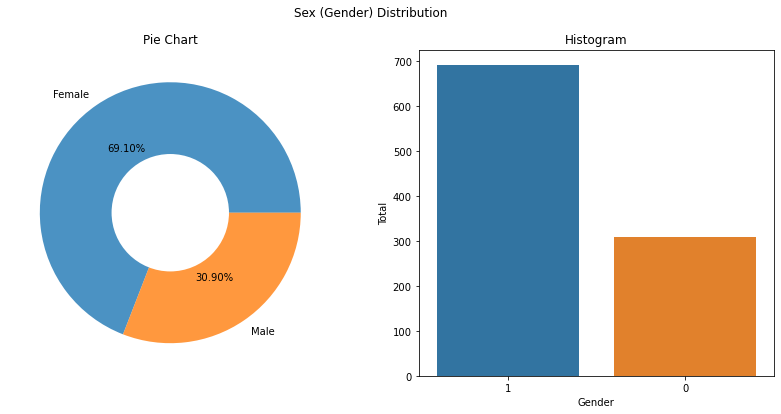

In [49]:
labels=['Female', 'Male']
order=df['sex'].value_counts().index


plt.figure(figsize= (14,6))
plt.suptitle('Sex (Gender) Distribution')


plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='sex',data=df,order=order)
plt.xlabel('Gender')
plt.ylabel('Total')
countplt

##### INFERENCE: FEMALES ARE IN HIGHER PROPORTION AS COMPARED TO MALES

### 2. DISTRIBUTION OF CHEST PAIN TYPES

In [50]:
df['cp'].value_counts()

Typical Angina     490
Non-Anginal        270
Atypical angina    163
Asymptomatic        77
Name: cp, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Pain Type', ylabel='Total'>

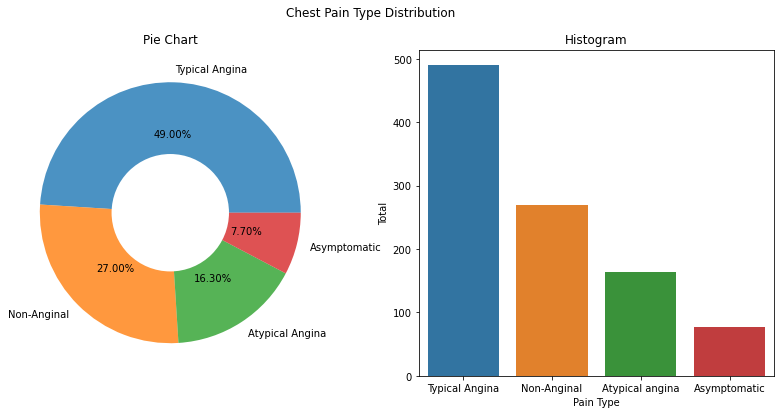

In [51]:
labels=['Typical Angina', 'Non-Anginal', 'Atypical Angina', 'Asymptomatic']
order=df['cp'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (14,6))
plt.suptitle('Chest Pain Type Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['cp'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='cp',data=df,order=order)
plt.xlabel('Pain Type')
plt.ylabel('Total')
countplt

##### INFERENCE: MOST COMMON CHEST PAIN TYPES ARE TYPICAL ANGINA - 49 % AND NON-ANGINAL - 27 %

### 3. DISTRIBUTION OF FASTING BLOOD SUGAR

In [52]:
df['fbs'].value_counts()

<= 120 mg/dl     854
> 120 mg/dl      146
Name: fbs, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Fasting Blood Sugar', ylabel='Total'>

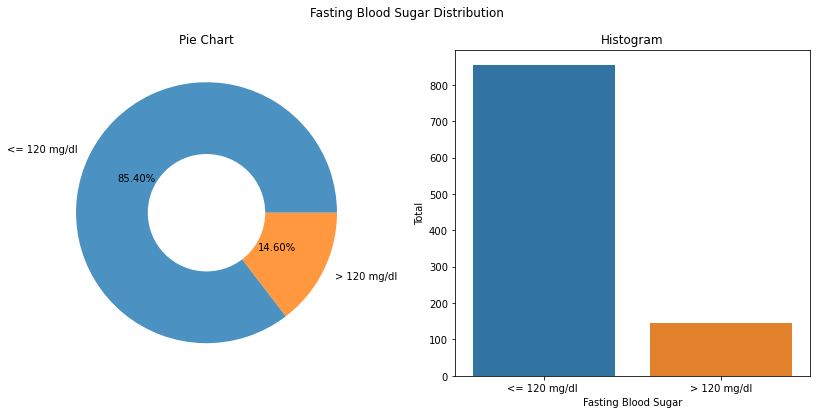

In [53]:
labels=['<= 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (14,6))
plt.suptitle('Fasting Blood Sugar Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='fbs',data=df,order=order)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
countplt

##### INFERENCE: 85 % OF THE POPULATION HAS FASTING BLOOD SUGAR OF LESS THAN 120 mg/dl (LOW BLOOD SUGAR)

### 4. DISTRIBTION OF FASTING BLOOD SUGAR IN DIFFERENT AGE GROUPS

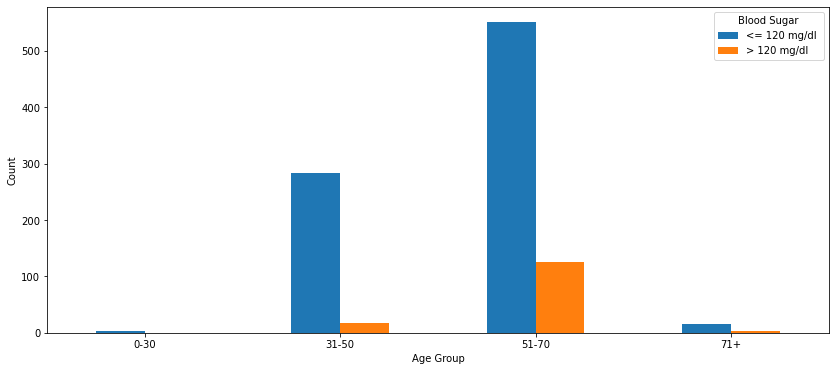

<Figure size 1008x432 with 0 Axes>

In [54]:
age_groups = pd.cut(df['age'], bins=[0, 30, 50, 70, np.inf])
order = ['0-30', '31-50', '51-70', '71+']


# Count blood pressure values for each age group
counts = df.groupby(age_groups)['fbs'].value_counts().unstack(fill_value=0)
counts.plot(kind='bar',figsize=(14,6))

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(range(len(order)), order, rotation='horizontal')
plt.legend(title='Blood Sugar')
plt.figure(figsize=(14,6))

# Show the plot
plt.tight_layout()
plt.show()

##### INFERENCE: PEOPLE IN THE RANGE OF 50-70 YEARS TEND TO HAVE HIGH BLOOD SUGAR FOLLOWED BY PEOPLE IN THE RANGE 30-50 YEARS

### 5. DISTRIBUTION OF HEART DISEASE

<AxesSubplot:title={'center':'Histogram'}, xlabel='Heart Disease Status', ylabel='Total'>

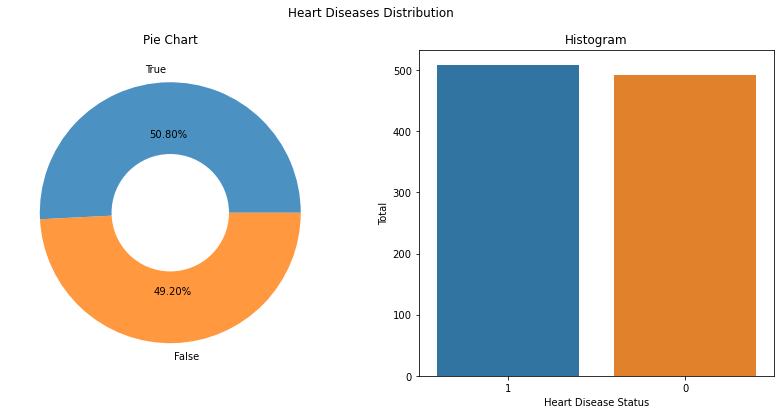

In [55]:
labels=['True', 'False']
order=df['target'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (14,6))
plt.suptitle('Heart Diseases Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram

countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='target',data=df,order=order)
plt.xlabel('Heart Disease Status')
plt.ylabel('Total')
countplt

##### INFERENCE: DISTRIBUTION OF HEART DISEASE AND NON HEART DISEASE PATIENTS IS UNIFORM

### 6. HEART DISEASE DISTRIBUTION BASED ON AGE GROUPS

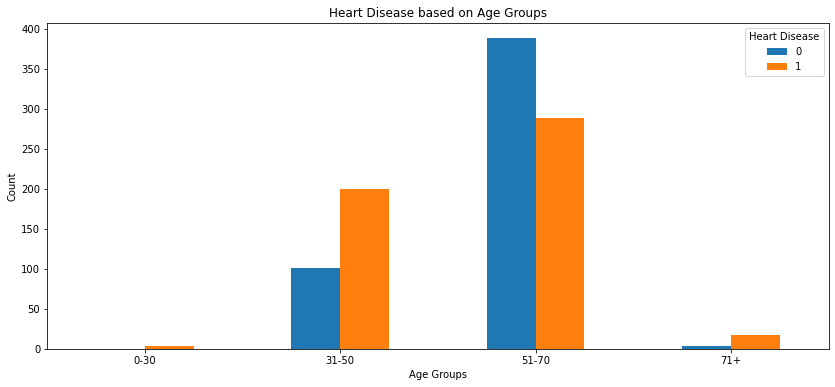

<Figure size 1008x432 with 0 Axes>

In [56]:
age_groups = pd.cut(df['age'], bins=[0, 30, 50, 70, np.inf])
order = ['0-30', '31-50', '51-70', '71+']


# Count blood pressure values for each age group
counts = df.groupby(age_groups)['target'].value_counts().unstack(fill_value=0)
counts.plot(kind='bar',figsize=(14,6))

# Customize the plot
plt.title('Heart Disease based on Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(range(len(order)), order, rotation='horizontal')
plt.legend(title='Heart Disease')
plt.figure(figsize=(14,6))

# Show the plot
plt.tight_layout()
plt.show()

##### INFERENCE: 
##### People in the age group 51-70 have the highest number of heart disease patients.
##### People in the age group 31-50 have a higher risk of developing heart disease as compared to people in the age group 51-70. 

### 7. HEART DISEASE DISTRIBUTION BASED ON GENDER

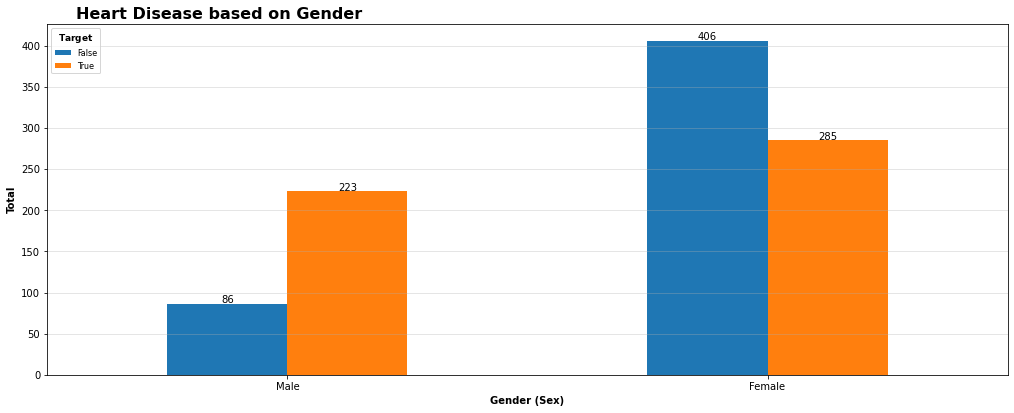

In [57]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']


# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(14, 6))


# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

##### INFERENCE: 
##### Females have the highest number of heart disease patients.
##### Males are at a higher risk of developing heart disease compared to females. 

### 8. HEART DISEASE DISTRIBUTION BASED ON EXERCISE INDUCED ANGINA

<AxesSubplot:title={'center':'Histogram'}, xlabel='Exercise Induced Angina', ylabel='Total'>

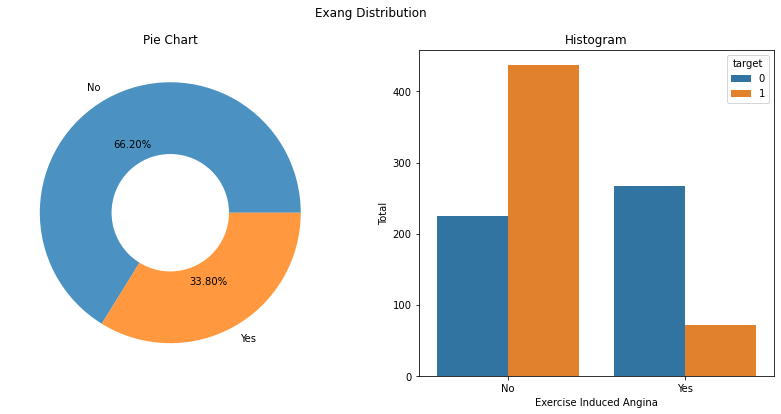

In [58]:
labels=['No', 'Yes']
order=df['exang'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (14,6))
plt.suptitle('Exang Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['exang'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(hue='target',x='exang',data=df)
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Total')
countplt

##### INFERENCE: PEOPLE WHO DID NOT DEVELOP EXERCISE INDUCED ANGINA TEND TO HAVE HEART DISEASE

### 9. HEART DISEASE DISTRIBUTION BASED ON MAJOR BLOOD VESSELS

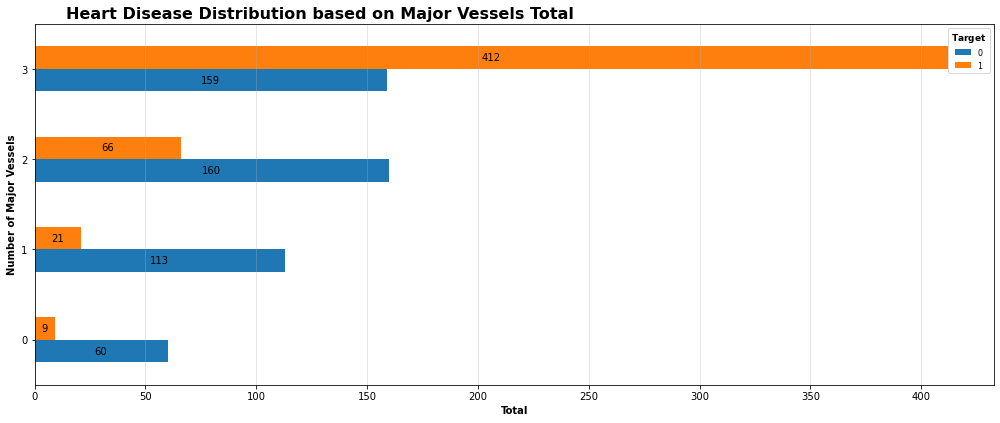

In [59]:
# --- Labels Settings ---
labels = ['0', '1']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(14, 6))

# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')

plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');


##### INFERENCE: 
##### People with 3 major vessels narrowing tend to have heart diseases. 
##### However, people who have 0-2 vessels narrowing tend not to have heart diseases.

### 10. HEART DISEASE DISTRIBUTION BASED ON THAL

In [60]:
df['thal'].value_counts()

Fixed Defect         533
Reversable Defect    403
Normal                64
Name: thal, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Thalassemia', ylabel='Total'>

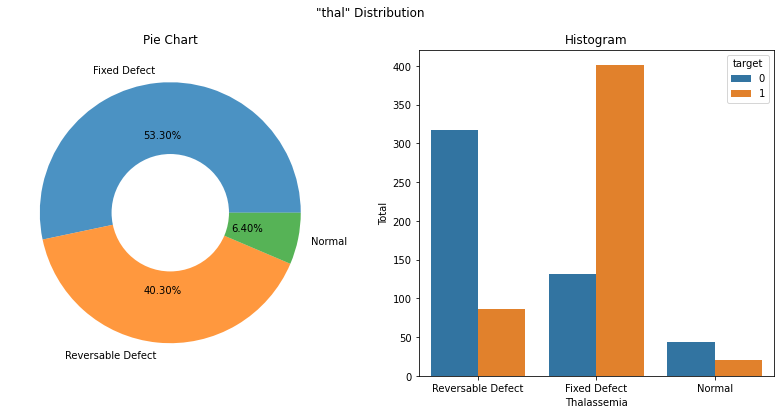

In [61]:
labels=['Fixed Defect','Reversable Defect','Normal']
order=df['thal'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (14,6))
plt.suptitle('"thal" Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['thal'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(hue='target',x='thal',data=df)
plt.xlabel('Thalassemia')
plt.ylabel('Total')
countplt

##### INFERENCE: 
##### PEOPLE WITH FIXED DEFECT THAL WERE FOUND TO BE HIGHEST AND THEY TEND TO HAVE HEART DISEASE

### 11. SCATTER PLOT FOR MAX HEART RATE VS AGE

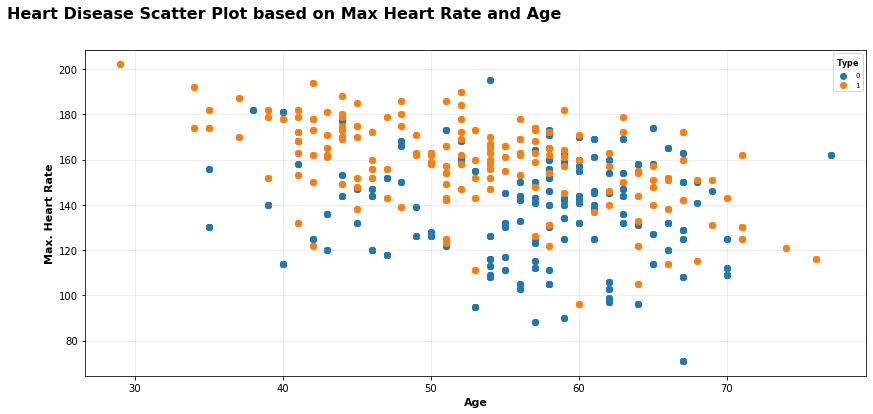

In [62]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(14, 6))
plt.suptitle('Heart Disease Scatter Plot based on Max Heart Rate and Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['0', '1'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

##### INFERENCE: 
##### Based on age, patients with and without heart diseases mostly between 50-70 years old. 
##### Non linear relationship between the variables
##### Patients with heart diseases tend to have high heart rate compared to patients with no heart diseases.

### 10. SCATTER PLOT FOR CHOLESTROL VS RESTING BLOOD PRESSURE

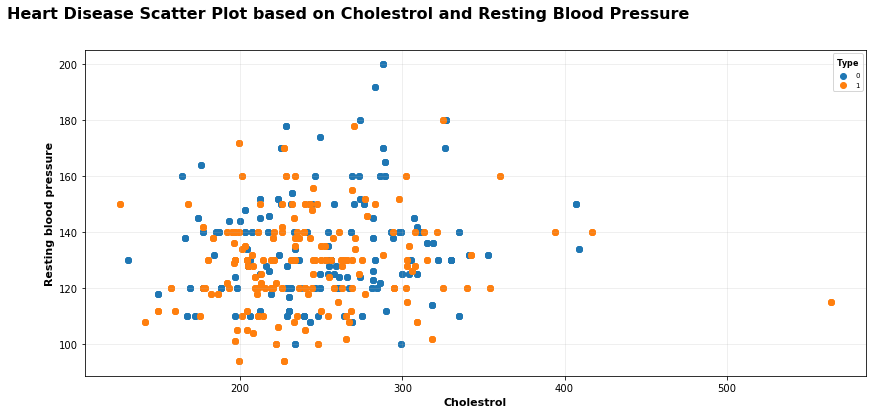

In [63]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(14, 6))
plt.suptitle('Heart Disease Scatter Plot based on Cholestrol and Resting Blood Pressure', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.chol[df.target==0], y=df.trestbps[(df.target==0)])
plt.scatter(x=df.chol[df.target==1], y=df.trestbps[(df.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['0', '1'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Cholestrol', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Resting blood pressure', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

##### INFERENCE: 
##### Majority of patients have chol levels between 200-300 and trestbps between 100-180
##### Non linear relationship between the variables
##### Patients with high chol levels tend to have heart disease
##### Patients with high trestbps levels may or may not have heart disease

## CORRELATION MATRIX

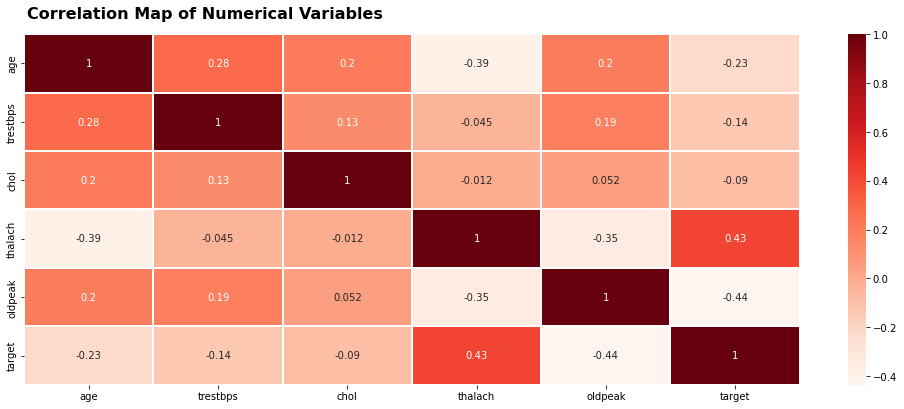

In [64]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 6))

sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

##### INFERENCE: 
##### We can observe that there seems to be very less correlation between most of the features
##### with the exception of max heart rate achieved and target variable.
##### Data is highly tangled and non linear in nature.

# DESCRIPTIVE STATISTICS

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   cp        1000 non-null   object 
 3   trestbps  1000 non-null   int64  
 4   chol      1000 non-null   int64  
 5   fbs       1000 non-null   object 
 6   restecg   1000 non-null   object 
 7   thalach   1000 non-null   int64  
 8   exang     1000 non-null   object 
 9   oldpeak   1000 non-null   float64
 10  slope     1000 non-null   object 
 11  ca        1000 non-null   object 
 12  thal      1000 non-null   object 
 13  target    1000 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 117.2+ KB


##### INFERENCE: 
##### 8 CATEGORICAL COLUMNS: sex, cp, fbs, restecg, exang, slope, ca, thal
##### 6 NUMERICAL COLUMNS: age, trestbps, chol, thalach, oldpeak, target

In [66]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.607000,131.592000,246.996000,148.977000,1.092400,0.508000
std,9.037822,17.714326,51.700802,23.083139,1.180727,0.500186
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.500000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,277.000000,165.000000,1.800000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


### SKEWNESS OF THE DISTRIBUTION CURVES

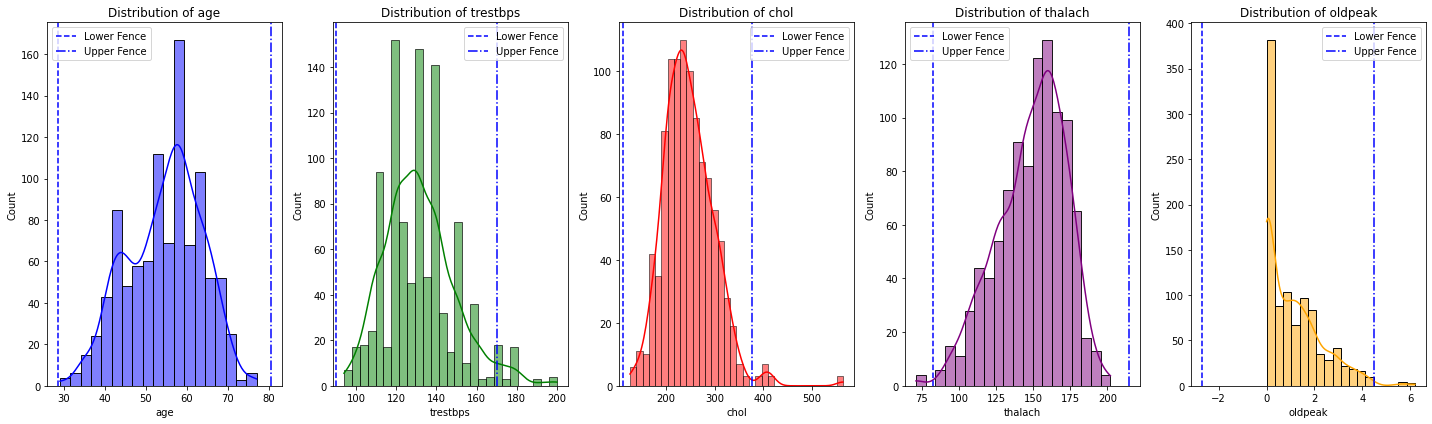

  Attribute  Skewness
0       age -0.261295
1  trestbps  0.736317
2      chol  1.060480
3   thalach -0.504628
4   oldpeak  1.183181


In [67]:
attributes =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, len(attributes), figsize=(20, 6))

# Plot the distribution plots with outlier line and count outliers
for i, attribute in enumerate(attributes):
    ax = axes[i]
    sns.histplot(data=df, x=attribute, kde=True, color=colors[i], ax=ax)
    ax.set_title(f'Distribution of {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    
    # Add a line indicating the outliers using Tukey's fences
    q1 = df[attribute].quantile(0.25)
    q3 = df[attribute].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    ax.axvline(lower_fence, color='blue', linestyle='--',label='Lower Fence')
    ax.axvline(upper_fence, color='blue', linestyle='-.',label='Upper Fence')
    ax.legend()


plt.tight_layout()
plt.show()

skewness_data = pd.DataFrame({'Attribute': attributes,
                              'Skewness': [df[attribute].skew() for attribute in attributes]})
print(skewness_data)

##### INFERENCE:
##### AGE AND THALACH ARE RIGHT SKEWED DISTRIBUTIONS
##### TRESTBPS, CHOL, OLDPEAK ARE LEFT SKEWED DISTRIBUTIONS

### BOXPLOTS FOR OUTLIER ANALYSIS

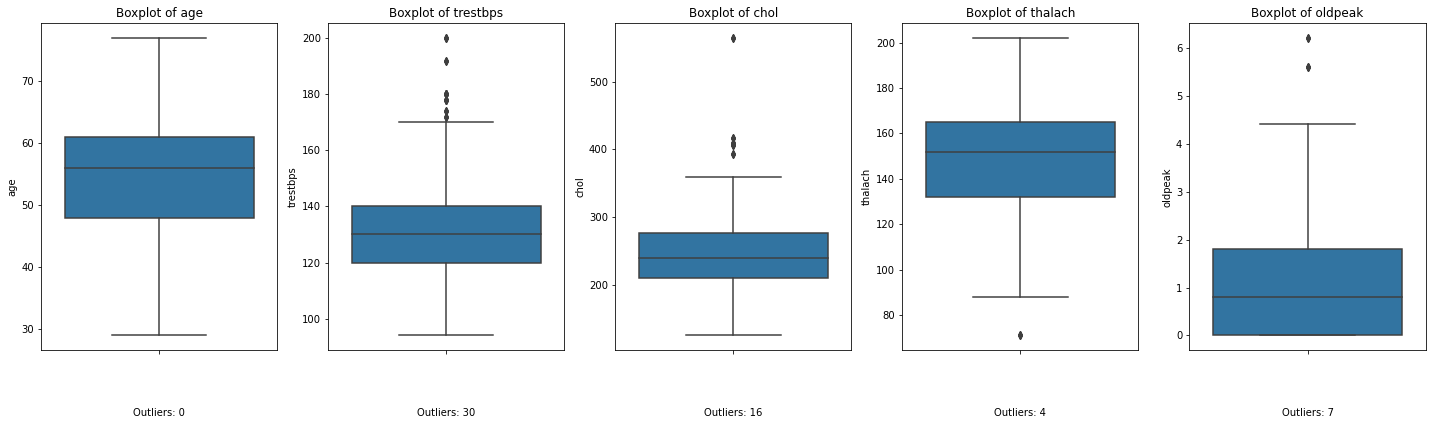

In [68]:
fig, axes = plt.subplots(1, len(attributes), figsize=(20, 6))
# Generate boxplots for outlier detection
for i, attribute in enumerate(attributes):
    ax = axes[i]
    sns.boxplot(data=df, y=attribute, ax=ax)
    ax.set_title(f'Boxplot of {attribute}')
    ax.set_ylabel(attribute)
    
    # Calculate and display the number of outliers
    q1 = df[attribute].quantile(0.25)
    q3 = df[attribute].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    
    num_outliers = df[(df[attribute] < lower_fence) | (df[attribute] > upper_fence)][attribute].count()
    ax.text(0.5, -0.2, f'Outliers: {num_outliers}', transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()

##### INFERENCE: 
##### TRESTBPS, CHOL, THALACH, OLDPEAK HAVE OUTLIERS

## DATA PREPROCESSING

### REMOVING NULL VALUES

In [69]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### LABEL ENCODING

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['cp'] = le.fit_transform(df.cp.values)
df['fbs'] = le.fit_transform(df.fbs.values)
df['restecg'] = le.fit_transform(df.restecg.values)
df['exang'] = le.fit_transform(df.exang.values)
df['thal'] = le.fit_transform(df.thal.values)
df['slope'] = le.fit_transform(df.slope.values)
df['ca'] = le.fit_transform(df.ca.values)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,3,125,212,0,2,168,0,1.0,2,1,2,0
1,53,1,3,140,203,1,1,155,1,3.1,0,3,2,0
2,70,1,3,145,174,0,2,125,1,2.6,0,3,2,0
3,61,1,3,148,203,0,2,161,0,0.0,2,2,2,0
4,62,0,3,138,294,1,2,106,0,1.9,1,0,0,0


### ONE HOT ENCODING

In [71]:
# categorical columns
cp = pd.get_dummies(df['cp'],prefix= 'cp')
fbs = pd.get_dummies(df['fbs'],prefix= 'fbs')
restecg = pd.get_dummies(df['restecg'],prefix= 'restecg')
exang = pd.get_dummies(df['exang'], prefix='exang')
slope = pd.get_dummies(df['slope'],prefix = 'slope')
ca = pd.get_dummies(df['ca'], prefix='ca')
thal = pd.get_dummies(df['thal'],prefix = 'thal')

#merge dummy variables to main data frame
frames = [ df,cp,fbs,restecg,exang,slope,ca,thal]
df = pd.concat(frames,axis=1)

#Dropping the unnecessory variables
df=df.drop(columns = ['cp','fbs','restecg','exang','slope','ca','thal'])
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


### SCALING

In [72]:
minmax = MinMaxScaler().fit_transform(df)
minmax

array([[0.47916667, 1.        , 0.29245283, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.43396226, ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.48113208, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.1509434 , ..., 1.        , 0.        ,
        0.        ],
       [0.4375    , 0.        , 0.1509434 , ..., 1.        , 0.        ,
        0.        ],
       [0.52083333, 1.        , 0.24528302, ..., 0.        , 0.        ,
        1.        ]])

In [73]:
standard = StandardScaler().fit_transform(df)
standard

array([[-0.28859878,  0.66871369, -0.3723144 , ..., -1.06832936,
        -0.26148818,  1.21712349],
       [-0.17789729,  0.66871369,  0.47488159, ..., -1.06832936,
        -0.26148818,  1.21712349],
       [ 1.70402799,  0.66871369,  0.75728025, ..., -1.06832936,
        -0.26148818,  1.21712349],
       ...,
       [-0.84210621,  0.66871369, -1.21951039, ...,  0.93604092,
        -0.26148818, -0.82160932],
       [-0.51000175, -1.49540829, -1.21951039, ...,  0.93604092,
        -0.26148818, -0.82160932],
       [-0.0671958 ,  0.66871369, -0.65471306, ..., -1.06832936,
        -0.26148818,  1.21712349]])

In [74]:
robust = RobustScaler().fit_transform(df)
robust

array([[-0.30769231,  0.        , -0.25      , ..., -1.        ,
         0.        ,  1.        ],
       [-0.23076923,  0.        ,  0.5       , ..., -1.        ,
         0.        ,  1.        ],
       [ 1.07692308,  0.        ,  0.75      , ..., -1.        ,
         0.        ,  1.        ],
       ...,
       [-0.69230769,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.46153846, -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15384615,  0.        , -0.5       , ..., -1.        ,
         0.        ,  1.        ]])

##### INFERENCE: RobustScaler scales the data based on percentiles. It subtracts the median of the feature and divides by the interquartile range (IQR). Since it uses the median instead of the mean, it is less affected by outliers.

### HYPOTHESIS TESTING - CHI SQUARED TEST

##### Null hypothesis (H0): There is no difference in the risk of developing heart disease between males and females.

##### Alternative hypothesis (H1): Males are at a higher risk of developing heart disease compared to females.

In [75]:
from scipy.stats import chi2_contingency

# Create a contingency table of gender (Sex) and heart disease presence (Target)
contingency_table = pd.crosstab(df['sex'], df['target'])

# Perform a chi-squared test for proportions
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Define the significance level
alpha = 0.05

# Check the result against the significance level
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis.")
    print("Males are at a higher risk of developing heart disease.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("The risk of developing heart disease is not significantly different between genders.")

There is significant evidence to reject the null hypothesis.
Males are at a higher risk of developing heart disease.


In [76]:
contingency_table

target,0,1
sex,,
0,86,223
1,406,285
